# DFA and Factor Investing

## HBS Case
### *Dimensional Fund Advisors, 2002 [HBS 9-203-026].

*Pages 1-5 of the case are required. Pages 6-11 get into interesting issues around trading (especially adverse selection) and tax considerations. These sections are useful for building market knowledge, but we will not cover them.**

# 1. READING - DFA's Strategy

#### 1. Investment philosophy.

* In 100 words or less, describe DFA's belief about how to find premium in the market.

* To what degree does their strategy rely on individual equity analysis? Macroeconomic fundamentals? Efficient markets?

* Are DFA's funds active or passive?

* What do DFA and others mean by a "value" stock? And a "growth" stock?

 - DFA believes that the markets are (broadly) efficient, with security prices reflecting all available information. As a result, consistent stock picking outperformance is impossible. Instead, DFA seeks systematic “premia” that academic research has shown to persist: small-cap and high book to market/value effects. Returns come as compensation for bearing risk, not from mispricing. DFA uses quantitative, evidence-based portfolio design and skilled low-cost trading, not forecasts or intuition, to capture these risk premia.
 - For individual equity analysis, DFA explicitly rejects firm specific forecasting and fundamental stock picking. Macroeconomic risks matter only to the extent as they shape broad factors (size, value) in expected returns. Efficient markets is DFA sauce
 - Passive in philosophy active in execution. Portfolios are designed to track risk factors (size, value) rather than specific indexes는데 traders add value by capturing liquidity discounts
 - High book to market ratio, growth is opposite. Idea is that for value copmany is priced low relative to their accounting equity showing that often they are distressed or risky (I am not sure how this sits with our definition of value stocks being more stable from like early on ie utility companies etc). Importantly Fama-French evidence showed that value stocks earn higher average returns because investors demand compensation for greater risk 

#### 2. Challenges for DFA's view.

* What challenge did DFA's model see in the 1980's?

* And in the 1990's?

- 1980's
    - DFA was founded on the “size effect”: Rolf Banz’s 1981 dissertation had shown that small-cap stocks historically earned higher average returns than large-cap stocks. DFA’s first funds (ie the U.S. 9–10 Small Company Portfolio) were built entirely around this principle
    - During the 1980s, the small stock premium collapsed. The U.S. entered a deep early-1980s recession, and small firms were hit hardest. Even as the overall economy and S&P 500 soared, small caps continued to lag badly
    - DFA’s strategy and marketing premise—that “size earns a risk premium”—appeared invalidated.
	- The benchmark S&P 500 (large-cap) outperformed DFA’s small-cap funds for many years.
	- Critics claimed either (i) the size effect had been arbitraged away once publicized (as efficient-market theory would predict), or (ii) DFA had entered small stocks at their peak.
- 1990s
    - In the early 1990s, DFA’s academic partners Eugene Fama and Kenneth French introduced the value premium: high book-to-market (“value”) stocks historically outperformed low book-to-market (“growth”) ones. DFA launched value-tilted funds based on this research 
    - Through the 1990s, especially the late decade—growth and technology stocks massively outperformed.
    - DFA again appeared to “miss the boat,” as clients watched the NASDAQ and large growth funds skyrocket.
    - The book-to-market premium seemed absent or reversed, undermining faith in the Fama-French framework.
	- The episode mirrored the earlier size-effect collapse, raising doubts about whether DFA’s factor premia were true risk rewards or merely transient anomalies.

#### 3. The market.

* Exhibit 3 has data regarding a universe of 5,020 firms. How many are considered ``large cap``? What percent of the market value do they account for?

* Exhibit 6 shows that the U.S. value factor (HML) has underperformed the broader U.S. equity market in 1926-2001, including every subsample except 1963-1981. So why should an investor be interested in this value factor?

- $207 / 5,020 = 4\% $ but have a market cap of around $ 70\%$
- At first glance, Exhibit 6 shows the U.S. HML factor delivering a lower mean return than the overall market over 1926–2001 (≈ 3.8 % vs 7.9 %) and underperforming in every subperiod except 1963–1981. Reason investor are interested in it are:
    - HML’s expected return represents compensation for bearing systematic risk
    - Although the historical average HML return was smaller, its payoff pattern hedges particular states of the world (distressed, low-growth periods), making it valuable in equilibrium as a state-contingent risk hedge.
    - The premium may re-emerge in different samples
    - DFA’s interpretation: Reject the irrational misprincing belief They argue that value stocks earn higher expected returns because they are riskier, and so, investors still demand compensation for holding them.

# 2. The Factors

DFA believes certain stocks have higher expected excess returns. In addition to the overall market equity premium, DFA believes that there is a premium attached to a **size** and **value** factor. Note that these three factors are already listed as **excess** returns.

### Data
Use the data found in `data/dfa_analysis_data.xlsx`.

- Monthly **excess** return data for the overall equity market, $\tilde{r}^{\text{mkt}}$. 

- The sheet also contains data on two additional factors, `SMB` and `HML`, as well as the risk-free rate. 

- You do not need any of these columns for the homework. Just use the `MKT` column, which is **excess** market returns. (So no need to subtract the risk-free rate.)

#### Source:

Ken French library, accessible through the pandas-datareader API.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
file = "data/dfa_analysis_data.xlsx"
fact_df = pd.read_excel(file, sheet_name="factors", parse_dates=True, index_col=0)
portfolios = pd.read_excel(file, sheet_name="portfolios (total returns)", parse_dates=True, index_col=0)
mkt = fact_df["Mkt-RF"].dropna()

### 1. The Factors

Calculate their univariate performance statistics: 

* mean
* volatility
* Sharpe
* VaR(.05)

Report these for the following three subsamples:

* Beginning - 1980
* 1981 - 2001
* 2002 - End

In [3]:
mean = fact_df.mean() * 12
vol = fact_df.std(ddof=1) * np.sqrt(12)


stats = pd.DataFrame({"mean": mean, "vol": vol})
stats["sharpe"] = stats["mean"] / stats["vol"]
var_05 = fact_df.quantile(0.05)
stats["VaR"] = var_05


display(stats)




def compute_stats(series):
    x = series.dropna()
    mean_ann = x.mean() * 12
    vol_ann = x.std(ddof=1) * np.sqrt(12)
    sharpe = mean_ann / vol_ann
    var_05 = x.quantile(0.05)    # monthly VaR
    return pd.Series({"mean": mean_ann, "vol": vol_ann,
                      "sharpe": sharpe, "VaR(0.05)": var_05})


for col in fact_df.columns:
    subsamples = {
        "Begin - 1980": fact_df[col].loc[:'1980-12-31'],
        "1981 - 2001": fact_df[col].loc['1981-01-01':'2001-12-31'],
        "2002 - End": fact_df[col].loc['2002-01-01':]
    }
    print("stats for:", col)
    stats = pd.DataFrame({label: compute_stats(s) for label, s in subsamples.items()}).T
    display(stats.round(4))

,mean,vol,sharpe,VaR
Mkt-RF,0.082770,0.184134,0.449507,-0.07922
SMB,0.020105,0.109348,0.183858,-0.04180
HML,0.041614,0.123227,0.337699,-0.04241
RF,0.032378,0.008636,3.749353,0.00000


stats for: Mkt-RF


,mean,vol,sharpe,VaR(0.05)
Begin - 1980,0.0810,0.2050,0.3949,-0.0841
1981 - 2001,0.0779,0.1572,0.4953,-0.0641
2002 - End,0.0913,0.1535,0.5947,-0.0773


stats for: SMB


,mean,vol,sharpe,VaR(0.05)
Begin - 1980,0.0339,0.1143,0.2968,-0.0419
1981 - 2001,-0.0020,0.1173,-0.0172,-0.0459
2002 - End,0.0079,0.0884,0.0897,-0.0392


stats for: HML


,mean,vol,sharpe,VaR(0.05)
Begin - 1980,0.0503,0.1342,0.3749,-0.0442
1981 - 2001,0.0646,0.1099,0.5876,-0.0416
2002 - End,0.0012,0.1064,0.0113,-0.0415


stats for: RF


,mean,vol,sharpe,VaR(0.05)
Begin - 1980,0.0277,0.0077,3.6140,0.0000
1981 - 2001,0.0631,0.0078,8.1372,0.0025
2002 - End,0.0158,0.0052,3.0381,0.0000



 - The 1980s and 1990s saw much weaker small-cap outperformance; large firms (esp. S&P 500 components) dominated.  SMB ≈ 0.02 → significantly smaller than the pre-1980 size premium documented by Banz (1981).
- During the 1990s, growth stocks, especially tech, greatly outperformed value. The HBS case itself notes that DFA “appeared to be missing the boat” while growth soared.
- The market factor remains robust.

### 3.

The factors are constructed in such a way as to reduce correlation between them.

* Report the correlation matrix across the three factors. 
    - (below)

* Does the construction method succeed in keeping correlations small? 
    - yes, correlations are low 
* Does it achieve this in each subsample?
    - yes as seen below, the magnitude of correlations is below 0.5 in all cases



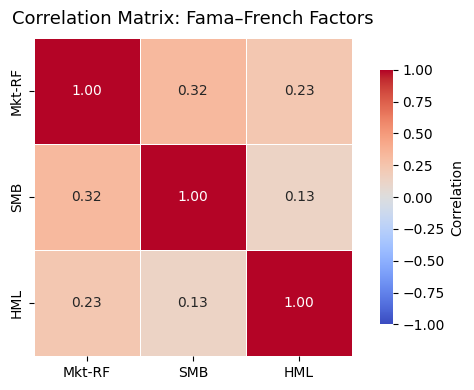

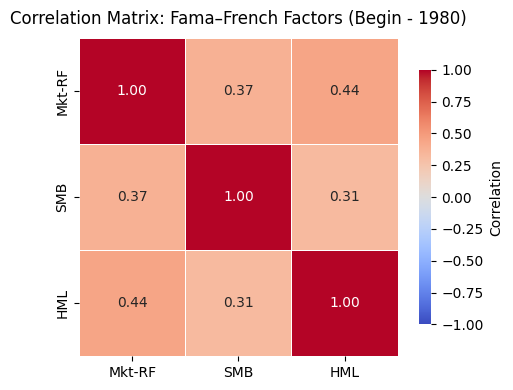

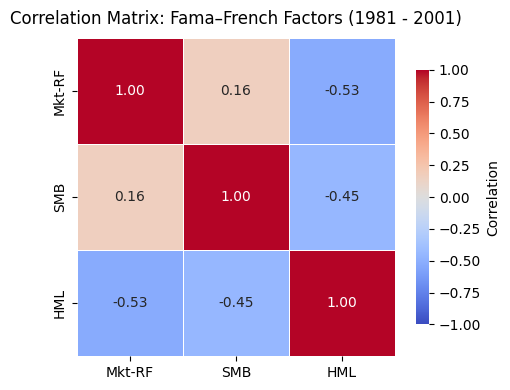

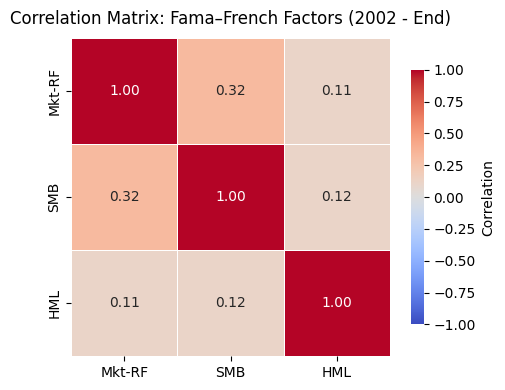

In [4]:
factors = fact_df[["Mkt-RF", "SMB", "HML"]]
corr = factors.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(
    corr, 
    annot=True,         
    cmap="coolwarm",     
    center=0,            
    vmin=-1, vmax=1,     
    square=True,         
    fmt=".2f",           
    linewidths=0.5,     
    cbar_kws={"shrink": 0.8, "label": "Correlation"}
)
plt.title("Correlation Matrix: Fama–French Factors", fontsize=13, pad=10)
plt.tight_layout()
plt.show()


subsamples = {
    "Begin - 1980": factors.loc[:'1980-12-31', ["Mkt-RF", "SMB", "HML"]],
    "1981 - 2001": factors.loc['1981-01-01':'2001-12-31', ["Mkt-RF", "SMB", "HML"]],
    "2002 - End": factors.loc['2002-01-01':, ["Mkt-RF", "SMB", "HML"]]
}

for label, df_sub in subsamples.items():
    corr = df_sub.corr()
    plt.figure(figsize=(5, 4))
    sns.heatmap(
        corr, annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1, 
        square=True, fmt=".2f", linewidths=0.5,
        cbar_kws={"shrink": 0.8, "label": "Correlation"}
    )
    plt.title(f"Correlation Matrix: Fama–French Factors ({label})", fontsize=12, pad=10)
    plt.tight_layout()
    plt.show()

### 4. 

* Plot the cumulative returns of the three factors. 

* Create plots for the 1981-2001 subsample as well as the 2002-Present subsample.


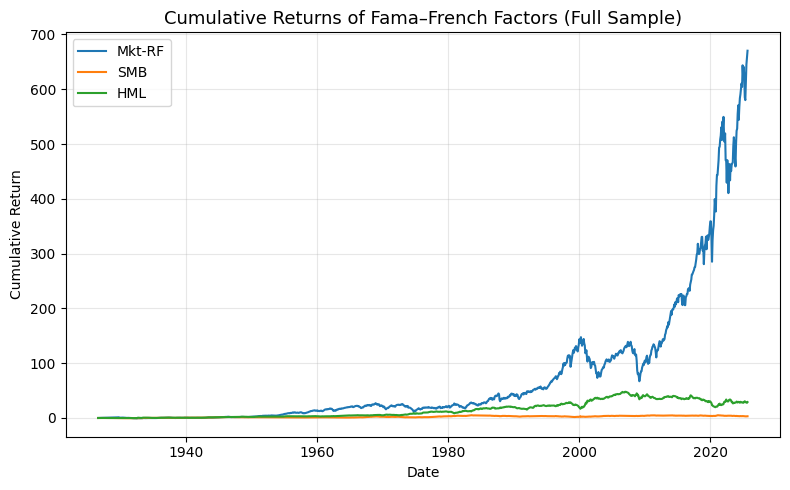

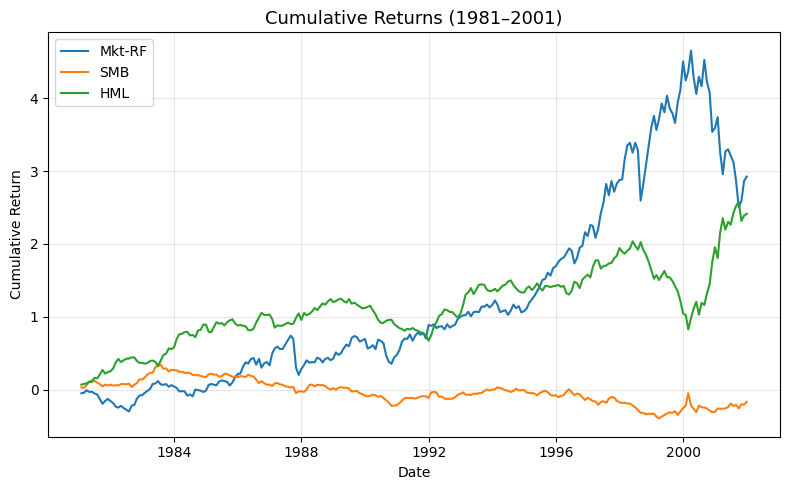

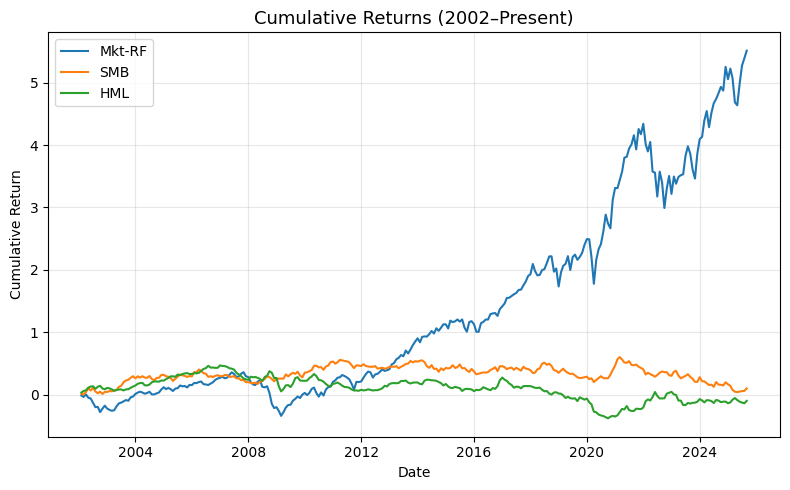

In [5]:
def cumulative_returns(df):
    return (1 + df).cumprod() - 1

cum_all = cumulative_returns(factors)

plt.figure(figsize=(8,5))
plt.plot(cum_all, lw=1.5)
plt.title("Cumulative Returns of Fama–French Factors (Full Sample)", fontsize=13)
plt.ylabel("Cumulative Return")
plt.xlabel("Date")
plt.legend(cum_all.columns)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- 1981–2001 ---
cum_81_01 = cumulative_returns(factors.loc['1981-01-01':'2001-12-31'])
plt.figure(figsize=(8,5))
plt.plot(cum_81_01, lw=1.5)
plt.title("Cumulative Returns (1981–2001)", fontsize=13)
plt.ylabel("Cumulative Return")
plt.xlabel("Date")
plt.legend(cum_81_01.columns)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- 2002–Present ---
cum_02_now = cumulative_returns(factors.loc['2002-01-01':])
plt.figure(figsize=(8,5))
plt.plot(cum_02_now, lw=1.5)
plt.title("Cumulative Returns (2002–Present)", fontsize=13)
plt.ylabel("Cumulative Return")
plt.xlabel("Date")
plt.legend(cum_02_now.columns)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 5.

* Does it appear that all three factors were valuable in 1981-2001? 
    - MKT - the market factor performed exceptionally well throughout the 1980s and 1990s. 
    - HML - Also valuable, Value stocks significantly outperformed during the mid-1980s through mid-1990s, contributing substantial positive cumulative returns.
    - SMB - Not valuable. The SMB line is flat to negative across the entire 1981–2001 period, confirming that small-cap stocks did not provide a reliable premium after 1980.
* And post-2001? 
    - MKT - Still very strong
    - Essentially flat to negative post-2002 — value underperformed growth through the 2010s, with a mild rebound only after 2020. The value premium weakened significantly in this era.
    - SMB - Modestly positive early (2002–2010), but flat or negative afterward. The small-cap premium remains weak and unreliable in modern data.

* Would you advise DFA to continue emphasizing all three factors?
	- The market premium should clearly remain central — it drives long-run equity returns.
    - The size factor (SMB) now appears largely redundant; its premium has been weak for decades, and its diversification benefits are small.
    - The value factor (HML) still provides some diversification benefits, particularly because of its negative or low correlation with the market, but its return advantage has been much less reliable post-2000.

# 3. CAPM

DFA believes that premia in stocks and stock portfolios is related to the three factors. 

Let's test `25` equity portfolios that span a wide range of size and value measures.

#### Footnote
For more on the portfolio construction, see the description at Ken French's data library. 
https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/tw_5_ports.html

#### Portfolios
Monthly **total** return data on `25` equity portfolios sorted by their size-value characteristics. Denote these as $\vec{r}^{i}$, for $n=1, \ldots, 25$.
- Note that while the factors were given as excess returns, the portfolios are total returns.
- For this entire problem, focus on the 1981-Present subsample.

### 1. Summary Statistics. 

For each portfolio, 
- Use the Risk-Free rate column in the factors tab to convert these total returns to excess returns.
- Calculate the (annualized) univariate statistics from `1.1`.

In [ ]:
start_date = '1981-01-01'
rf = fact_df.loc[start_date:, 'RF']
port25 = portfolios.loc[start_date:]

excess25 = port25.sub(rf, axis=0)

def compute_stats(series):
    x = series.dropna()
    mean_ann = x.mean() * 12
    vol_ann = x.std(ddof=1) * np.sqrt(12)
    sharpe = mean_ann / vol_ann
    var_05 = x.quantile(0.05)
    return pd.Series({
        "mean": mean_ann,
        "vol": vol_ann,
        "sharpe": sharpe,
        "VaR(0.05)": var_05
    })

stats_25 = excess25.apply(compute_stats, axis=0).T
display(stats_25.round(4))

,mean,vol,sharpe,VaR(0.05)
SMALL LoBM,0.0117,0.2717,0.0431,-0.1249
ME1 BM2,0.0884,0.2354,0.3756,-0.0949
ME1 BM3,0.0902,0.2008,0.4493,-0.0848
ME1 BM4,0.1125,0.1940,0.5800,-0.0776
SMALL HiBM,0.1273,0.2084,0.6110,-0.0882
ME2 BM1,0.0609,0.2447,0.2490,-0.1032
ME2 BM2,0.0984,0.2054,0.4790,-0.0834
ME2 BM3,0.1052,0.1864,0.5640,-0.0803
ME2 BM4,0.1081,0.1819,0.5942,-0.0753
ME2 BM5,0.1132,0.2137,0.5298,-0.0933


### 2. CAPM

The Capital Asset Pricing Model (CAPM) asserts that an asset (or portfolio's) expected excess return is completely a function of its beta to the equity market index (`SPY`, or in this case, `MKT`.) 

Specifically, it asserts that, for any excess return, $\tilde{r}^{i}$, its mean is proportional to the mean excess return of the market, $\tilde{r}^{\text{mkt}}$, where the proporitonality is the regression beta of $\tilde{r}^{i}$ on $\tilde{r}^{\text{mkt}}$.

$$
\mathbb{E}\left[\tilde{r}_{t}^{i}\right] = \beta^{i,\text{mkt}}\; \mathbb{E}\left[\tilde{r}_{t}^{\text{mkt}}\right]
$$

Let's examine whether that seems plausible.

For each of the $n=25$ test portfolios, run the CAPM time-series regression:

$$
\tilde{r}_{t}^{i} = \alpha^i + \beta^{i,\text{mkt}}\; \tilde{r}_{t}^{\text{mkt}} + \epsilon_{t}^{i}
$$

So you are running 25 separate regressions, each using the $T$-sized sample of time-series data.

* Report the betas and alphas for each test asset.

* Report the mean-absolute-error of the CAPM:
$$\text{MAE} = \frac{1}{n}\sum_{i=1}^n \left|\alpha_i\right|$$

If the CAPM were true, what would we expect of the MAE?

- Report the estimated $\beta^{i,\text{mkt}}$, Treynor Ratio, $\alpha^i$, and Information Ratio for each of the $n$ regressions.

- If the CAPM model were true, what would be true of the Treynor Ratios, alphas, and Information Ratios?

In [12]:
X = sm.add_constant(mkt)
rows = []
for name, y in excess25.items():
    y = y.dropna()
    Xi = X.loc[y.index]
    fit = sm.OLS(y, Xi).fit()
    beta = fit.params['Mkt-RF']
    alpha_m = fit.params['const']                 
    alpha_a = alpha_m * 12                        
    mean_excess_a = y.mean() * 12                 
    tr = mean_excess_a / beta                     
    te_a = fit.resid.std(ddof=1) * np.sqrt(12)   
    ir = alpha_a / te_a if te_a > 0 else np.nan
    rows.append({
        "beta_mkt": beta,
        "treynor": tr,
        "alpha": alpha_a,
        "info_ratio": ir,
        "R2": fit.rsquared
    })

capm_table = pd.DataFrame(rows, index=excess25.columns)
capm_table = capm_table[["beta_mkt","treynor","alpha","info_ratio","R2"]]
# Mean-absolute alpha (CAPM MAE)
capm_mae = capm_table["alpha"].abs().mean()
display(capm_table.round(4))
print("CAPM MAE (annualized |alpha|):", round(capm_mae, 4))

,beta_mkt,treynor,alpha,info_ratio,R2
SMALL LoBM,1.3585,0.0086,-0.1037,-0.6047,0.6014
ME1 BM2,1.1658,0.0759,-0.0106,-0.0705,0.5900
ME1 BM3,1.0495,0.0860,0.0010,0.0088,0.6571
ME1 BM4,0.9773,0.1151,0.0295,0.2435,0.6105
SMALL HiBM,0.9939,0.1281,0.0429,0.3058,0.5476
ME2 BM1,1.3341,0.0457,-0.0524,-0.4018,0.7154
ME2 BM2,1.1390,0.0864,0.0016,0.0151,0.7401
ME2 BM3,1.0357,0.1015,0.0171,0.1812,0.7426
ME2 BM4,0.9765,0.1107,0.0251,0.2493,0.6937
ME2 BM5,1.1108,0.1019,0.0188,0.1488,0.6505


CAPM MAE (annualized |alpha|): 0.0207


- If CAPM was true, then all alphas should be ~0 in population, so as MAE -> 0 as T -> $ \infty $, in finite sample (like the one we have), we would expect a small MAE, as a reuslt of sampling noise, whose magnitude shrinks with larger T.
- As a result of this the Betas would get closer to one and therefore the Treynor Ratio should tend towards to the market’s mean excess return
- Similarly, as alpha goes to 0 the IR should go to 0

### 3. Cross-sectional Estimation

Let's test the CAPM directly. We already have what we need:

- The dependent variable, (y): mean excess returns from each of the $n=25$ portfolios.
- The regressor, (x): the market beta from each of the $n=25$ time-series regressions.

Then we can estimate the following equation:

$$
\underbrace{\mathbb{E}\left[\tilde{r}^{i}\right]}_{n\times 1\text{ data}} = \textcolor{ForestGreen}{\underbrace{\eta}_{\text{regression intercept}}} + \underbrace{{\beta}^{i,\text{mkt}};}_{n\times 1\text{ data}}~ \textcolor{ForestGreen}{\underbrace{\lambda_{\text{mkt}}}_{\text{regression estimate}}} + \textcolor{ForestGreen}{\underbrace{\upsilon}_{n\times 1\text{ residuals}}}
$$

Note that
- we use sample means as estimates of $\mathbb{E}\left[\tilde{r}^{i}\right]$. 
- this is a weird regression! The regressors are the betas from the time-series regressions we already ran!
- this is a single regression, where we are combining evidence across all $n=25$ series. Thus, it is a cross-sectional regression!
- the notation is trying to emphasize that the intercept is different than the time-series $\alpha$ and that the regressor coefficient is different than the time-series betas.

Report
- the R-squared of this regression.
- the intercept, $\eta$. 
- the regression coefficient, $\lambda_{\text{mkt}}$.

What would these three statistics be if the CAPM were completely accurate?

In [15]:
mean_excess = excess25.mean() * 12
betas = capm_table['beta_mkt']

# Align and run cross-sectional regression
X = sm.add_constant(betas)
y = mean_excess
model = sm.OLS(y, X).fit()

print(model.summary())

eta = model.params['const']
lambda_mkt = model.params['beta_mkt']
r2 = model.rsquared

print(f"Cross-sectional R^2: {r2:.4f}")
print(f"Intercept (η): {eta:.4f}")
print(f"lambda_mkt (slope): {lambda_mkt:.4f}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     10.49
Date:                Sun, 26 Oct 2025   Prob (F-statistic):            0.00363
Time:                        14:52:51   Log-Likelihood:                 63.825
No. Observations:                  25   AIC:                            -123.6
Df Residuals:                      23   BIC:                            -121.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2058      0.035      5.891      0.0

- If CAPM were completely accurate we should expect to see $ \eta = 0 , \lambda_{mkt} = $ market's risk premium and $ R^2 = 1 $ 

### 4. Conclusion

Broadly speaking, do these results support DFA's belieef in size and value portfolios containing premia unrelated to the market premium?

Yes, these results results strongly support DFA’s belief that size and value portfolios earn premia that cannot be explained by the market factor alone.

The CAPM assumes that a portfolio’s expected return depends only on its exposure to market risk, meaning higher-beta portfolios should have proportionally higher returns. But your findings contradict this. The cross-sectional regression produced a negative slope ($ \lambda_{mkt} < 0 $) and a significant positive intercept, implying that portfolios with similar market betas still earn systematically different average returns. In other words, the market premium alone does not explain why small-cap and high book-to-market (value) portfolios outperform large-cap and growth portfolios.

These results match decades of empirical evidence: small and value stocks have higher expected returns even after controlling for market exposure. Thus, your estimates provide direct support for DFA’s multi-factor view — that there exist additional, persistent sources of risk premia tied to firm size and valuation, distinct from the market beta captured by the CAPM.

# 4. Extensions

### 1.

Re-do the analysis of `3.2` and `3.3`, but instead of using the market return as the factor, use a new factor: the in-sample tangency portfolio of the $n=25$ portfolios. 

You will not use the factor data for this problem!

- Calculate $\tilde{r}^{\text{tan}}$ by solving the MV optimization of the $n$ excess returns. 
- Consider this to be your single factor.

Instead of testing the CAPM, you will test the tangency-factor model:

$$
\mathbb{E}\left[\tilde{r}_{t}^{i}\right] = \beta^{i,\text{tan}}\; \mathbb{E}\left[\tilde{r}_{t}^{\text{tan}}\right]
$$

What do you find?

### 2.

Re-do the analysis of `3.2` and `3.3`, but instead of using only the `MKT` factor, use `MKT`, `SMB`, and `HML`. 

(Note again that all three are already given as **excess** returns, so there is no need to use the risk-free rate data.)

Thus, instead of testing the CAPM, you will be testing the Fama-French 3-Factor Model.

$$
\mathbb{E}\left[\tilde{r}_{t}^{i}\right] = \beta^{i,\text{mkt}}\; \mathbb{E}\left[\tilde{r}_{t}^{\text{mkt}}\right] + \beta^{i,\text{size}}\; \mathbb{E}\left[\tilde{r}_{t}^{\text{size}}\right] + \beta^{i,\text{val}}\; \mathbb{E}\left[\tilde{r}_{t}^{\text{val}}\right]
$$

### 3.

We measured how well the CAPM performs by checking the MAE of the time-series alphas.

Under classic statistical assumptions, we can test the null hypothesis that the CAPM works by calculating,

$$
H = T\left[1+\left(\text{SR}_{\text{mkt}}\right)^2\right]^{-1} \boldsymbol{\alpha}'\boldsymbol{\Sigma}_\epsilon^{-1}\boldsymbol{\alpha}
$$

This test statistic has a chi-squared distribution...

$$H\sim \chi^2_n$$

Note the following:

- $\boldsymbol{\alpha}$ is an $n\times 1$ vector of the individual regression alphas, $\alpha^i$.
- $\boldsymbol{\Sigma}_\epsilon$ is the $n\times n$ covariance matrix of the time-series of regression residuals, $\epsilon^i$, corresponding to each regression. 
- $\text{SR}_{\text{mkt}}$ is the Sharpe-Ratio of $\tilde{r}^{\text{mkt}}$.

The test statistic, $H$, has a chi-squared distribution with $n=25$ degrees of freedom. So under the null hypothesis of the CAPM holding, $H$ should be small, and the distribution allows us to calculate the probability of seeing such a large $H$, conditional on the CAPM being true.

- Which is a stricter test: checking whether any of the $n$ values of $\alpha^i$ have a statistically significant t-test or checking whether $H$ calculated above is significant?

- Conceptually, how does the test-statistic $H$ relate to checking whether $\tilde{r}^{\text{mkt}}$ spans the tangency portfolio?